In [7]:
from qiskit.circuit.library import RealAmplitudes
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
import numpy as np
from sklearn import datasets
from qiskit import circuit
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [8]:
digits = datasets.load_digits()
zeros_data=digits['data'][digits['target'].argsort()][0:100]
ones_data=digits['data'][digits['target'].argsort()][177+1:177+101]
zeros_label=digits['target'][digits['target'].argsort()][0:100]
ones_label=digits['target'][digits['target'].argsort()][177+1:177+101]
data=np.vstack((zeros_data,ones_data))
label=np.hstack((zeros_label,ones_label))

In [9]:
zeros_data_test=digits['data'][digits['target'].argsort()][100:110]
ones_data_test=digits['data'][digits['target'].argsort()][177+101:177+111]
zeros_label_test=digits['target'][digits['target'].argsort()][100:110]
ones_label_test=digits['target'][digits['target'].argsort()][177+101:177+111]
data_test=np.vstack((zeros_data_test,ones_data_test))
label_test=np.hstack((zeros_label_test,ones_label_test))

In [10]:
tsvd = TruncatedSVD(n_components=4)
data = tsvd.fit_transform(data)
tsvd = TruncatedSVD(n_components=4)
data_test = tsvd.fit_transform(data_test)

In [11]:
data=data/np.abs(data).max()
data_test=data_test/np.abs(data_test).max()

In [12]:
def Merge(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res 

feature_map2 = QuantumCircuit(2)
x0 = circuit.Parameter("x0")
x1 = circuit.Parameter("x1")
feature_map2.h([0,1])
feature_map2.p(2*x0, 0)
feature_map2.p(2*x1, 1)
feature_map2.cx(0,1)
feature_map2.p(2*(np.pi-x0)*(np.pi-x1),1)
feature_map2.draw(output="mpl")

pauli_feature_map = feature_map2

para0 = circuit.Parameter("para0")
para1 = circuit.Parameter("para1")
para2 = circuit.Parameter("para2")
para3 = circuit.Parameter("para3")
method = QuantumCircuit(2)
method.ry(para0,0)
method.ry(para1,1)
method.cx(0,1)
method.ry(para2,0)
method.ry(para3,1)
method.draw(output="mpl")

ansatz=method

cir = QuantumCircuit(2, 2)
cir = cir.compose(pauli_feature_map,[0,1])
cir = cir.compose(ansatz,[0,1])
cir.measure([0,1],[0,1])
cir.draw(output='mpl')

In [13]:
x0 = circuit.Parameter("x0")
x1 = circuit.Parameter("x1")
x2 = circuit.Parameter("x2")
x3 = circuit.Parameter("x3")
para0 = circuit.Parameter("para0")
para1 = circuit.Parameter("para1")
para2 = circuit.Parameter("para2")
para3 = circuit.Parameter("para3")
psi0 = circuit.Parameter("psi0")
psi1 = circuit.Parameter("psi1")

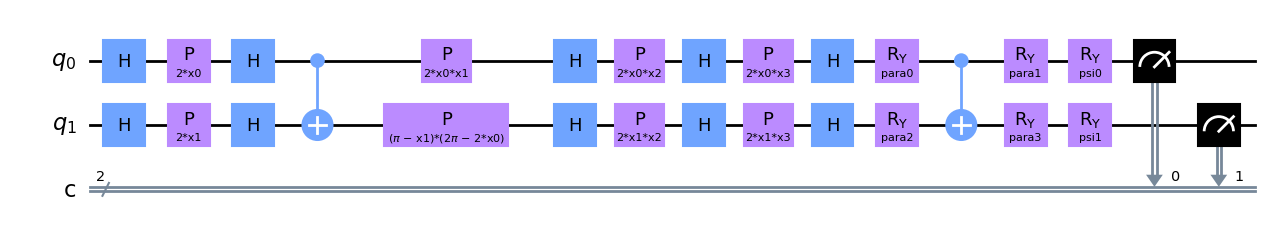

In [78]:
circ1 = QuantumCircuit(2,2)
encode1 = QuantumCircuit(2)
encode1.h(0)
encode1.h(1)
encode1.p(2*x0,0)
encode1.p(2*x1,1)
encode1.h(0)
encode1.h(1)
encode1.cx(0,1)
encode1.p(2*x0*x1,0)
encode1.h(0)
encode1.p(2*x0*x2,0)
encode1.h(0)
encode1.p(2*x0*x3,0)
encode1.p(2*(np.pi-x0)*(np.pi-x1),1)
encode1.h(1)
encode1.p(2*x1*x2,1)
encode1.h(1)
encode1.p(2*x1*x3,1)
vary1 = QuantumCircuit(2)
vary1.h(0)
vary1.h(1)
vary1.ry(para0,0)
vary1.ry(para2,1)
vary1.cx(0,1)
vary1.ry(para1,0)
vary1.ry(para3,1)
vary1.ry(psi0,0)
vary1.ry(psi1,1)
circ1 = QuantumCircuit(2,2)
circ1 = circ1.compose(encode1,[0,1])
circ1 = circ1.compose(vary1,[0,1])
circ1.measure([0,1],[0,1])
circ1.draw(output='mpl')

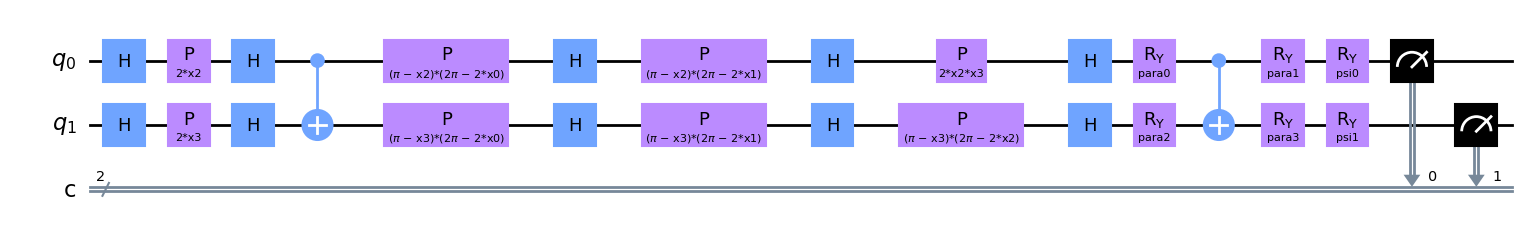

In [79]:
circ2 = QuantumCircuit(2,2)
encode2 = QuantumCircuit(2)
encode2.h(0)
encode2.h(1)
encode2.p(2*x2,0)
encode2.p(2*x3,1)
encode2.h(0)
encode2.h(1)
encode2.cx(0,1)
encode2.p(2*(np.pi-x0)*(np.pi-x2),0)
encode2.h(0)
encode2.p(2*(np.pi-x1)*(np.pi-x2),0)
encode2.h(0)
encode2.p(2*x2*x3,0)
encode2.p(2*(np.pi-x0)*(np.pi-x3),1)
encode2.h(1)
encode2.p(2*(np.pi-x1)*(np.pi-x3),1)
encode2.h(1)
encode2.p(2*(np.pi-x2)*(np.pi-x3),1)
vary2 = QuantumCircuit(2)
vary2.h(0)
vary2.h(1)
vary2.ry(para0,0)
vary2.ry(para2,1)
vary2.cx(0,1)
vary2.ry(para1,0)
vary2.ry(para3,1)
vary2.ry(psi0,0)
vary2.ry(psi1,1)
circ2 = QuantumCircuit(2,2)
circ2 = circ2.compose(encode2,[0,1])
circ2 = circ2.compose(vary2,[0,1])
circ2.measure([0,1],[0,1])
circ2.draw(output='mpl')

In [80]:
circ=[circ1,circ2]

In [82]:
circ1.parameters

ParameterView([Parameter(para0), Parameter(para1), Parameter(para2), Parameter(para3), Parameter(psi0), Parameter(psi1), Parameter(x0), Parameter(x1), Parameter(x2), Parameter(x3)])

In [81]:
parity=["00","11"]
def get_output_single(circuit,x,para):
    value_dict_1 = dict(zip(encode2.parameters,x))
    value_dict_2 = dict(zip(vary2.parameters,para))
    value_dict=Merge(value_dict_1, value_dict_2)
    new_cq=circuit.assign_parameters(value_dict, inplace=False)
    simulator = QasmSimulator()
    compiled_circuit = transpile(new_cq, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    distribution=[0,0]
    for key in counts.keys():
        if key in parity:
            distribution[0]=distribution[0]+counts[key]
        else:
            distribution[1]=distribution[1]+counts[key]
    predict = distribution[0]/(distribution[0]+distribution[1])
    return predict

In [91]:
para = np.random.random(52)

In [92]:
para

array([0.87810782, 0.86954653, 0.02569272, 0.69881879, 0.77294287,
       0.13070954, 0.93868876, 0.5229579 , 0.72875946, 0.51962197,
       0.95820874, 0.92364366, 0.60038378, 0.34101344, 0.43436465,
       0.66385834, 0.00288245, 0.99916272, 0.82852542, 0.12443949,
       0.27034399, 0.8357751 , 0.71914593, 0.29330399, 0.7837802 ,
       0.82390422, 0.01496655, 0.73302983, 0.71664296, 0.0887639 ,
       0.69662576, 0.90088508, 0.50380804, 0.61361416, 0.96875356,
       0.62671767, 0.96929976, 0.12259007, 0.75735924, 0.77288717,
       0.79531448, 0.41547653, 0.3352322 , 0.49847831, 0.24147132,
       0.06035979, 0.608789  , 0.30874382, 0.88863748, 0.29039968,
       0.45543293, 0.39930925])

In [93]:
para_new = gradient_decent(circ,data[0],para,label[0])

In [94]:
get_loss(circ,data[0],para_new,label[0])

0.3763952693632864

In [95]:
para_new = gradient_decent(circ,data[0],para_new,label[0])

In [96]:
get_loss(circ,data[0],para_new,label[0])

0.3131726576422411

In [86]:
def get_output_multi(circuit,x,para):
    theta = para[:48].reshape(-1,2,6)
    result = [1, 1, 1, 1]
    for i in range(4):
        for j in range(len(theta[i])):
            result[i] = result[i] * get_output_single(circ[j],x,theta[i][j])
    return result

In [87]:
def get_output_sum(circuit,x,para):
    outputs = get_output_multi(circuit,x,para)
    lam = para[48:]
    result = 0
    for i in range(4):
        result = result + lam[i]*outputs[i]
    if result<0:
        result=0
    if result>1:
        result=1
    return result

In [88]:
def get_loss(circuit,x,para,y):
    output = get_output_sum(circuit,x,para)
    return np.abs(output-y)

In [89]:
def gradient_calculate(circuit,x,para,y,index,eps=np.pi/2):
    e_i = np.identity(para.size)[:,index]
    plus = para + eps*e_i
    minus = para - eps*e_i
    gradient = (get_loss(circuit,x,plus,y)-get_loss(circuit,x,minus,y))/2
    return gradient

In [90]:
def gradient_decent(circuit,x,para,y):
    para_new = np.copy(para)
    for index in range(len(para)): 
        gradient = gradient_calculate(circuit,x,para,y,index)
        para_new[index] = para[index] - 0.1*gradient
    return para_new

In [102]:
data=[[2,2.1,3,2],[3,3,1,3],[4,0.6,2,3],[2,2,-3,-2],[3,1,-1,-4],[1,1,-4,-2]]
label=[0,0,0,1,1,1]
data=np.array(data)
data=data/5

In [103]:
data

array([[ 0.4 ,  0.42,  0.6 ,  0.4 ],
       [ 0.6 ,  0.6 ,  0.2 ,  0.6 ],
       [ 0.8 ,  0.12,  0.4 ,  0.6 ],
       [ 0.4 ,  0.4 , -0.6 , -0.4 ],
       [ 0.6 ,  0.2 , -0.2 , -0.8 ],
       [ 0.2 ,  0.2 , -0.8 , -0.4 ]])

In [107]:
para = np.random.random(52)

In [108]:
for i in range(5):
    for j in range(len(label_test)):
        x=data_test[j]
        y=label_test[j]
        para=gradient_decent(circ,x,para,y)
    predicts=[]   
    for j in range(len(label_test)):
        x=data_test[j]
        y=label_test[j]
        predict = get_output_sum(circ,x,para)
        if predict<0.5:
            predicts.append(0)
        else:
            predicts.append(1)
    predicts=np.array(predicts)
    loss=np.abs((predicts-label_test)).mean()
    print(loss)
    #print((predicts==label).sum()/len(predicts))

0.25
0.0
0.0
0.0
0.0


In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(
    data_test[:, 0][label_test == 1],
    data_test[:, 1][label_test == 1],
    c="b",
    marker="^",
    edgecolors="k",
    label="class 1 validation",
)

plt.scatter(
    data_test[:, 0][label_test == 0],
    data_test[:, 1][label_test == 0],
    c="r",
    marker="^",
    edgecolors="k",
    label="class 0 validation",
)

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
cm = plt.cm.RdBu

# make data for decision regions
xx, yy = np.meshgrid(np.linspace(0.5, 1, 20), np.linspace(-0.5, 0.5, 20))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]
predictions_grid = [get_output(cir, f ,para) for f in X_grid]
Z = np.reshape(predictions_grid, xx.shape)
cnt = plt.contourf(xx, yy, Z, levels=np.arange(0, 1.1, 0.1), cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[0, 0, 1])


# plot data

plt.scatter(
    data_test[:, 0][label_test == 1],
    data_test[:, 1][label_test == 1],
    c="b",
    marker="^",
    edgecolors="k",
    label="class 1 validation",
)

plt.scatter(
    data_test[:, 0][label_test == 0],
    data_test[:, 1][label_test == 0],
    c="r",
    marker="^",
    edgecolors="k",
    label="class 0 validation",
)

plt.legend()
plt.show()